# Benchmark - Usage Example

After running the algorithms, this notebook will load the benchmark data for results analysis purposes. So, first, we load the data:

In [1]:
import benchmark as bmk
import result as rst
mybmk = bmk.Benchmark('void')
mybmk.importdata('mybenchmark')

Now, before seeing the results, we are interested in checking the average DNL of the test set:

The average DNL was: 0.1938
The standard deviation was: 0.0543


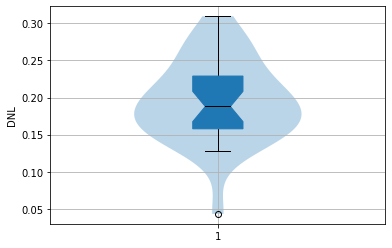

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Collect DNL data
dnl = np.zeros(mybmk.testset.sample_size)
for i in range(dnl.size):
    dnl[i] = mybmk.testset.test[i].dnl

print('The average DNL was: %.4f' % np.mean(dnl))
print('The standard deviation was: %.4f' % np.std(dnl))

plt.violinplot(dnl, showextrema=False) 
plt.boxplot(dnl, notch=True, patch_artist=True,
            boxprops=dict(color='tab:blue'), medianprops=dict(color='k'))
plt.grid(True)
plt.ylabel('DNL')
plt.show()

Now, we want to se the best reconstruction by each algorithm according to the $\zeta_{\epsilon PAD}$ indicator:

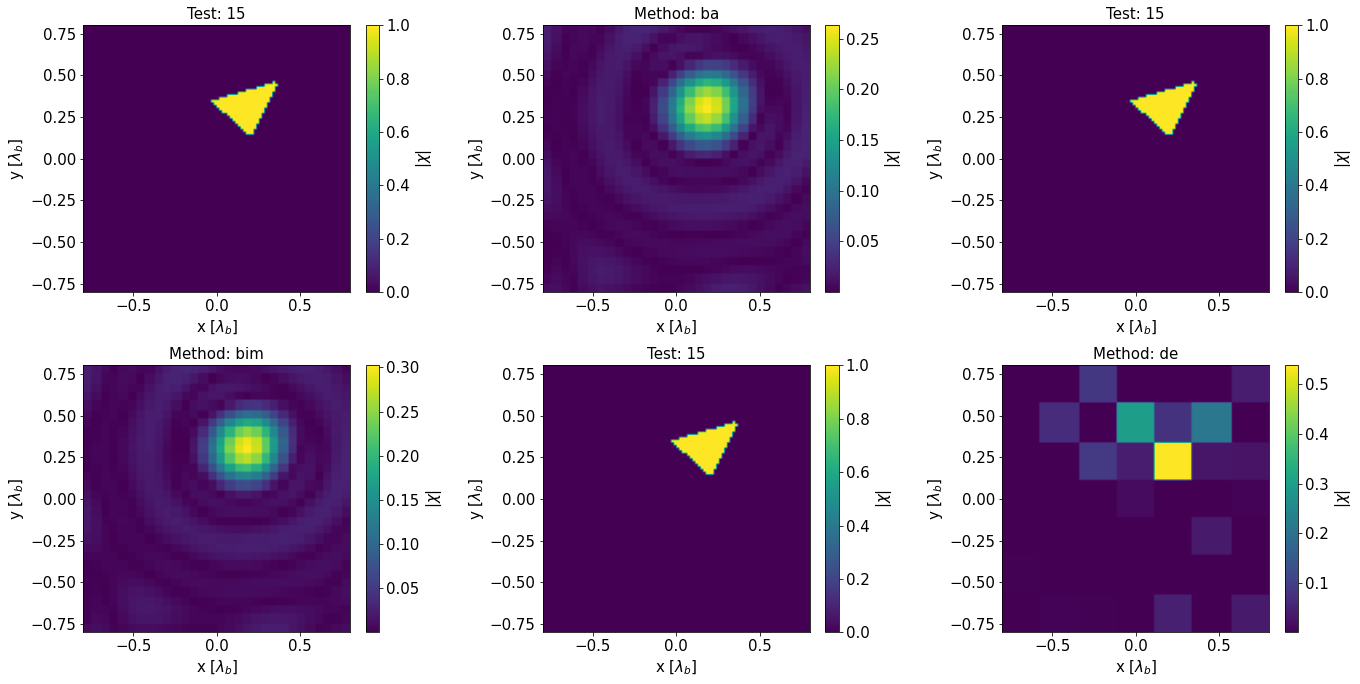

In [3]:
mybmk.reconstruction(indicator=rst.REL_PERMITTIVITY_PAD_ERROR,
                     mode=bmk.BEST_TEST,
                     show=True,
                     fontsize=15)

Now, let's see the results for $\zeta_{\epsilon PAD}$ for each instance:

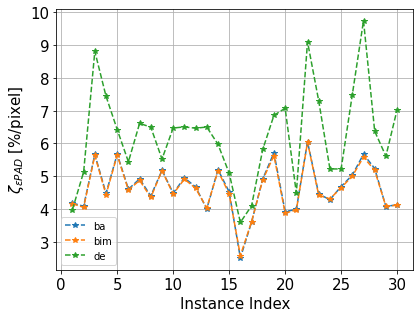

In [4]:
mybmk.plot(rst.REL_PERMITTIVITY_PAD_ERROR, testset=0, show=True, fontsize=15)

Next, let's see the boxplot:

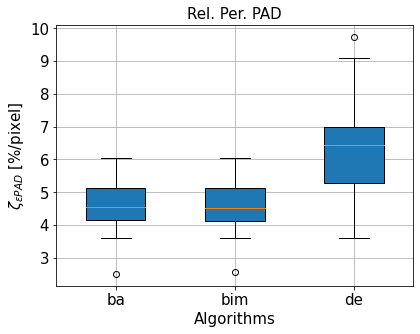

In [5]:
mybmk.boxplot(rst.REL_PERMITTIVITY_PAD_ERROR, testset=0, show=True,
              color='tab:blue', fontsize=15)

Next, the violinplot (which includes the boxplot information):

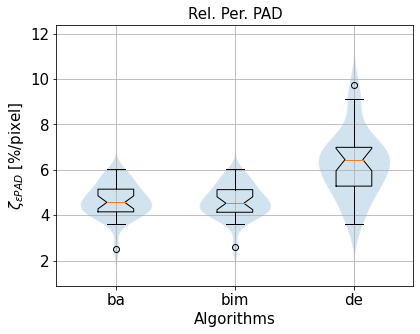

In [6]:
mybmk.violinplot(rst.REL_PERMITTIVITY_PAD_ERROR, testset=0, show=True,
                 fontsize=15, color='tab:blue')

Now, let's compare the three algorithms and ask for multiple comparisons in case of rejection of the null hypothesis of equality of means:

In [7]:
mybmk.compare(rst.REL_PERMITTIVITY_PAD_ERROR, all2all=True)

Kruskal-Wallis H-Test
Data: zeta_epad of  ba, bim, de
Statistic: 28.7081, p-value: 5.836e-07
All-to-all comparison method: Multiple Mann-Whitney U test (Non-parametric)
* ba = bim, p-value: 6.843e-01
* ba = de, p-value: 4.744e-06
* bim = de, p-value: 3.324e-06



Finally, let's see the confidence interval for each mean:

Confidence Intervals
Indicator: zeta_epad
* ba, Normality: True, 95.0 Confi. In.: (4.37e+00, 4.92e+00)
* bim, Normality: True, 95.0 Confi. In.: (4.35e+00, 4.89e+00)
* de, Normality: True, 95.0 Confi. In.: (5.73e+00, 6.80e+00)



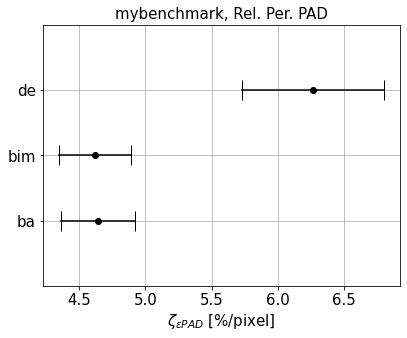

In [8]:
mybmk.confint(rst.REL_PERMITTIVITY_PAD_ERROR, show=True, fontsize=15)

That's all, folks!